In [81]:
# importing required libraries
import pandas as pd

### Data source https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv

In [82]:
#reading the file
car_df=pd.read_csv(r'car data.csv')

In [83]:
#previewing the data
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Column dictionary

- Car Name: name of the car.

- Year: This column should be filled with the year in which the car was bought.

- Selling_Price: This column should be filled with the price the owner wants to sell the car at.

- Present_Price: This is the current ex-showroom price of the car.

- Kms_Driven: This is the distance completed by the car in km.

- Fuel_Type: Fuel type of the car.

- Seller_Type: Defines whether the seller is a dealer or an individual.

- Transmission: Defines whether the car is manual or automatic.

- Owner: Defines the number of owners the car has previously had.

In [84]:
# check for missing values
car_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [85]:
# No missing values

In [86]:
car_df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [87]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [88]:
#list of columns in dataset
car_df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [89]:
cat_variables=['Fuel_Type','Seller_Type','Transmission']

In [90]:
#subcategories of catergorical column
for i in cat_variables:
    print("column Name ->",i, "\nUnique values ->",car_df[i].unique())

column Name -> Fuel_Type 
Unique values -> ['Petrol' 'Diesel' 'CNG']
column Name -> Seller_Type 
Unique values -> ['Dealer' 'Individual']
column Name -> Transmission 
Unique values -> ['Manual' 'Automatic']


In [91]:
# converting categorical variables to numerical using binary encoding
car_df['Seller_Type']=car_df['Seller_Type'].map({'Dealer':0,'Individual':1})
car_df['Transmission']=car_df['Transmission'].map({'Manual':0,'Automatic':1})

In [92]:
pd.get_dummies(car_df['Fuel_Type']).head(50)

,CNG,Diesel,Petrol
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
5,0,1,0
6,0,0,1
7,0,1,0
8,0,1,0
9,0,1,0


In [93]:
# converting categorical variables to numerical using one hot encoding
temp=pd.get_dummies(car_df['Fuel_Type'],drop_first=True)

In [94]:
car_df=pd.concat([car_df,temp],axis=1)

In [95]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Diesel,Petrol
0,ritz,2014,3.35,5.59,27000,Petrol,0,0,0,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,0,0,0,1,0
2,ciaz,2017,7.25,9.85,6900,Petrol,0,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,0,0,0,0,1
4,swift,2014,4.60,6.87,42450,Diesel,0,0,0,1,0


In [96]:
# droping Fuel_type and Car_Name columns 
car_df.drop(['Car_Name','Fuel_Type'],axis=1,inplace=True)

#### Derived columns

In [97]:
# derived no years since car brought
car_df['No.years']=car_df['Year'].apply(lambda x: 2020-x)

In [98]:
car_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Diesel,Petrol,No.years
0,2014,3.35,5.59,27000,0,0,0,0,1,6
1,2013,4.75,9.54,43000,0,0,0,1,0,7
2,2017,7.25,9.85,6900,0,0,0,0,1,3
3,2011,2.85,4.15,5200,0,0,0,0,1,9
4,2014,4.60,6.87,42450,0,0,0,1,0,6


In [99]:
car_df.drop('Year',axis=1,inplace=True)

In [100]:
car_df.head()

,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Diesel,Petrol,No.years
0,3.35,5.59,27000,0,0,0,0,1,6
1,4.75,9.54,43000,0,0,0,1,0,7
2,7.25,9.85,6900,0,0,0,0,1,3
3,2.85,4.15,5200,0,0,0,0,1,9
4,4.60,6.87,42450,0,0,0,1,0,6


In [101]:
car_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Diesel,Petrol,No.years
Selling_Price,1.000000,0.878983,0.029187,-0.550724,0.367128,-0.088344,0.552339,-0.540571,-0.236141
Present_Price,0.878983,1.000000,0.203647,-0.512030,0.348715,0.008057,0.473306,-0.465244,0.047584
Kms_Driven,0.029187,0.203647,1.000000,-0.101419,0.162510,0.089216,0.172515,-0.172874,0.524342
Seller_Type,-0.550724,-0.512030,-0.101419,1.000000,-0.063240,0.124269,-0.350467,0.358321,0.039896
Transmission,0.367128,0.348715,0.162510,-0.063240,1.000000,0.050316,0.098643,-0.091013,0.000394
Owner,-0.088344,0.008057,0.089216,0.124269,0.050316,1.000000,-0.053469,0.055687,0.182104
Diesel,0.552339,0.473306,0.172515,-0.350467,0.098643,-0.053469,1.000000,-0.979648,-0.064315
Petrol,-0.540571,-0.465244,-0.172874,0.358321,-0.091013,0.055687,-0.979648,1.000000,0.059959
No.years,-0.236141,0.047584,0.524342,0.039896,0.000394,0.182104,-0.064315,0.059959,1.000000


In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

(9.5, -0.5)

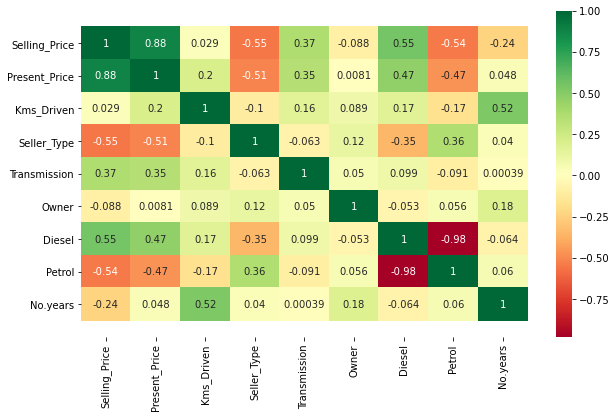

In [103]:
plt.figure(figsize=(10,6))
fig=sns.heatmap(car_df.corr(),annot=True,cmap='RdYlGn')
bottom, top = fig.get_ylim()
fig.set_ylim(bottom + 0.5, top - 0.5)

In [104]:
X=car_df.iloc[:,1:]
y=car_df.iloc[:,0]

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [107]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [108]:
rfg=RandomForestRegressor()

In [109]:
rfg.fit(X_train,y_train)

RandomForestRegressor()

In [110]:
y_pred=rfg.predict(X_test)

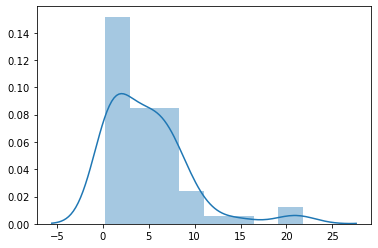

In [111]:
residual=y_test-y_pred
sns.distplot(y_pred)

In [112]:
from sklearn.metrics import mean_squared_error

In [113]:
mean_squared_error(y_pred,y_test)

0.9383543460655743

In [114]:
lin=LinearRegression()

In [115]:
lin.fit(X_train,y_train)

LinearRegression()

In [116]:
y_pred=lin.predict(X_test)

In [117]:
mean_squared_error(y_pred,y_test)

3.4788039706378595

In [118]:
xgb=XGBRegressor(objective='reg:squarederror')

In [119]:
xgb.fit(X_train,y_train)

XGBRegressor(objective='reg:squarederror')

In [120]:
y_pred=xgb.predict(X_test)

In [121]:
mean_squared_error(y_test,y_pred)

0.8502751516507485

In [122]:
## Hypertuning XGboost paramas using randomsearchCV

In [123]:
from sklearn.model_selection import RandomizedSearchCV

In [124]:
# choosing hyperparamas
params={'learning_rate':[0.0, 0.2, 0.4, 0.6, 0.8, 1.0],'n_estimators':[int(i) for i in np.linspace(100,1200,num=12)],'subsample':[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]}

<IPython.core.display.Javascript object>

In [125]:
#instance of RandomizedsearchCV
rsc=RandomizedSearchCV(xgb,param_distributions=params,verbose=2,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

In [126]:
#fit the model
rsc.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] subsample=0.2, n_estimators=1100, learning_rate=0.2 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.2, n_estimators=1100, learning_rate=0.2, total=   0.4s
[CV] subsample=0.2, n_estimators=1100, learning_rate=0.2 .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  subsample=0.2, n_estimators=1100, learning_rate=0.2, total=   0.4s
[CV] subsample=0.2, n_estimators=1100, learning_rate=0.2 .............
[CV]  subsample=0.2, n_estimators=1100, learning_rate=0.2, total=   0.4s
[CV] subsample=0.2, n_estimators=1100, learning_rate=0.2 .............
[CV]  subsample=0.2, n_estimators=1100, learning_rate=0.2, total=   0.4s
[CV] subsample=0.2, n_estimators=1100, learning_rate=0.2 .............
[CV]  subsample=0.2, n_estimators=1100, learning_rate=0.2, total=   0.4s
[CV] subsample=1.0, n_estimators=100, learning_rate=0.0 ..............
[CV]  subsample=1.0, n_estimators=100, learning_rate=0.0, total=   0.1s
[CV] subsample=1.0, n_estimators=100, learning_rate=0.0 ..............
[CV]  subsample=1.0, n_estimators=100, learning_rate=0.0, total=   0.0s
[CV] subsample=1.0, n_estimators=100, learning_rate=0.0 ..............
[CV]  subsample=1.0, n_estimators=100, learning_rate=0.0, total=   0.0s
[CV] subsample=1.0, n_estimators=100, learning_rate=0.0 ..........

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   16.7s finished


RandomizedSearchCV(cv=5, estimator=XGBRegressor(objective='reg:squarederror'),
                   param_distributions={'learning_rate': [0.0, 0.2, 0.4, 0.6,
                                                          0.8, 1.0],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200],
                                        'subsample': [0.0, 0.2, 0.4, 0.6, 0.8,
                                                      1.0]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=2)

In [127]:
rsc.best_params_

{'subsample': 0.2, 'n_estimators': 1000, 'learning_rate': 0.2}

In [128]:
rsc.best_estimator_

XGBRegressor(learning_rate=0.2, n_estimators=1000, objective='reg:squarederror',
             subsample=0.2)

In [129]:
y_pred=rsc.estimator.predict(X_test)

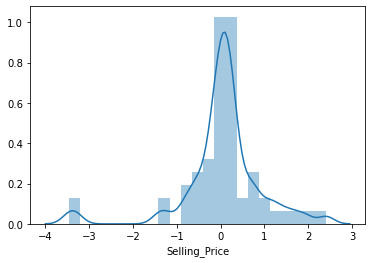

In [130]:
#Residual analysis to validate the model
sns.distplot(y_pred-y_test)

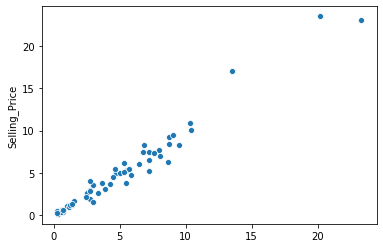

In [131]:
sns.scatterplot(y_pred,y_test)

In [132]:
mean_squared_error(y_pred,y_test)

0.8502751516507485

In [133]:
import pickle

In [149]:
with open('model.pkl','wb') as f:
    pickle.dump(rsc.estimator,f)

In [150]:
model=pickle.load(open('model.pkl','rb'))

,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Diesel,Petrol,No.years
0,0.57,2400.0,1.0,1.0,0.0,0.0,1.0,4.0


In [160]:
[0.57,2400,1,1,0,0,1,4]

[0.57, 2400, 1, 1, 0, 0, 1, 4]

In [159]:
model.predict(X_test.head(1))

array([0.56668204], dtype=float32)

In [148]:
model

XGBRegressor(missing=nan, objective='reg:squarederror')

In [161]:
X.columns

Index(['Present_Price', 'Kms_Driven', 'Seller_Type', 'Transmission', 'Owner',
       'Diesel', 'Petrol', 'No.years'],
      dtype='object')